In [ ]:
import torch

my_tensor = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float32, requires_grad=True)

print(my_tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
my_tensor = my_tensor.to(device)
print(my_tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]], requires_grad=True)


In [ ]:
x = torch.rand(3,5)
rows = torch.tensor([1,0])
print(x)
cols = torch.tensor([4,0])


tensor([[0.9546, 0.5545, 0.7512, 0.3953, 0.1778],
        [0.9736, 0.3571, 0.0207, 0.1962, 0.6303],
        [0.0619, 0.9508, 0.7301, 0.3115, 0.9413]])


In [ ]:
x[rows, cols]

tensor([0.6303, 0.9546])

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
class NN(nn.Module):
  def __init__(self, input_size, num_classes):
    super(NN,self).__init__()
    self.fc1 = nn.Linear(input_size, 50)
    self.fc2 = nn.Linear(50, num_classes)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


torch.Size([64, 10])


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 2

In [ ]:
train_dataset = datasets.MNIST(root="dataset/", train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:09<00:00, 1084221.01it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 75717.66it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1501392.20it/s]


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7960939.73it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [ ]:
test_dataset = datasets.MNIST(root="dataset/", train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
model = NN(input_size=input_size, num_classes=num_classes).to(device)

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
  for batch_idx, (data, targets) in enumerate(train_loader):
    data = data.to(device=device)
    targets = targets.to(device=device)
    data = data.reshape(data.shape[0], -1)

    scores = model(data)
    loss_value = loss(scores, targets)

    optimizer.zero_grad() #reset gradients after each batch
    loss_value.backward()

    optimizer.step()

In [ ]:
def check_accuracy(loader, model):
  num_correct = 0
  num_samples = 0
  model.eval()

  with torch.no_grad():
    for x, y in loader:
      x = x.to(device=device)
      y = y.to(device=device)
      x = x.reshape(x.shape[0], -1)
      scores = model(x)
      _, predictions = scores.max(1)
      num_correct += (predictions == y).sum()
      num_samples += predictions.size(0)

  print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

  model.train()

check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Got 56990 / 60000 with accuracy 94.98
Got 9462 / 10000 with accuracy 94.62


CNNs

In [ ]:
class CNN(nn.Module):
  def __init__(self, in_channels=1, num_classes=10):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels=8, kernel_size=(3,3), stride=(1,1), padding=(1,1))
    self.pool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
    self.fc1 = nn.Linear(16*7*7, num_classes)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fc1(x)
    return x

In [ ]:
model = CNN()


Pytorch Docs

In [1]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

In [9]:
data = torch.rand(1,3,64,64)
model = resnet18(weights=ResNet18_Weights.DEFAULT)
labels = torch.rand(1,1000)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 142MB/s]


In [10]:
prediction = model(data)
loss = (prediction - labels).sum()
loss.backward()
optim = torch.optim.SGD(model.parameters(), lr = 1e-4, momentum = 0.9)
optim.step()

In [11]:
print(loss)

tensor(-494.7059, grad_fn=<SumBackward0>)


In [12]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand((5,5), requires_grad=True)

a = x + y
print(f"Does 'a' require gradients?, {a.requires_grad}")
b = x + z
print(f"Does 'b' require gradients?, {b.requires_grad}")

Does 'a' require gradients?, False
Does 'b' require gradients?, True


In [ ]:
for param in model.parameters():
  param.requires_grad = False

model.fc = nn.Linear(512,10)


In [16]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 6, 5, 1)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6, 16, 5, 1)
    self.pool = nn.MaxPool2d(2,2)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(400, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x

model = Net()
print(model)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
params = list(model.parameters())
print(len(params))
print(params[1].size())

10
torch.Size([6])


In [17]:
input = torch.randn(1,1,32,32)
output = model(input)
print(output)

tensor([[-0.1553, -0.1145,  0.0054,  0.0687,  0.2564,  0.0901, -0.0386,  0.0518,
          0.0792,  0.0527]], grad_fn=<AddmmBackward0>)


In [18]:
model.zero_grad()
output.backward(torch.randn(1,10))

In [19]:
target = torch.rand(1,10)
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5172, grad_fn=<MseLossBackward0>)


In [20]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [25]:
model.zero_grad()

print('conv1.bias.grad before backward')
print(model.conv1.bias.grad)

output = model(input)
loss = criterion(output, target)
loss.backward()

print('conv1.bias.grad after backward')
print(model.conv1.bias.grad)


conv1.bias.grad before backward
None
conv1.bias.grad after backward
tensor([ 0.0032, -0.0080,  0.0223,  0.0010,  0.0099,  0.0064])


CIFAR Dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [17]:
batch_size = 32
image_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
train_dataset = datasets.CIFAR10(root="dataset/", train=True, transform=image_transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.CIFAR10(root="dataset/", train = False, transform = image_transform, download=True)
test_loader = DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f'The image dimensions are: {images.shape}, the target label is : {labels.shape}')

The image dimensions are: torch.Size([32, 3, 32, 32]), the target label is : torch.Size([32])


In [26]:
print(f'the total number of images are: {len(train_loader.dataset)}')
print(f'the total number of batches are: {len(train_loader)}')

the total number of images are: 50000
the total number of batches are: 1563


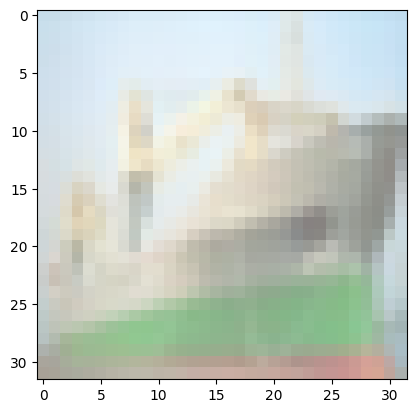

In [20]:
from matplotlib import pyplot as plt
import numpy as np

def view_image(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

view_image(images[5])

In [22]:
in_channels = 3
num_classes = 10
learning_rate = 0.001
batch_size = 32
num_epochs = 5

class CIFAR(nn.Module):
  def __init__(self, in_channels, num_classes):
    super(CIFAR,self).__init__()

    self.conv1 = nn.Conv2d(in_channels, 8, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(8, 16, 3)
    self.pool = nn.MaxPool2d(2,2)
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(16*6*6, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, num_classes)

  def forward(self, x):
    x = self.pool(self.conv1(x))
    x = self.pool(self.conv2(x))
    x = self.flatten(x)
    x = self.fc1(F.relu(x))
    x = self.fc2(F.relu(x))
    x = self.fc3(x)
    return x

model = CIFAR(in_channels, num_classes)
print(model)

CIFAR(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
for epoch in range(2):
  current_loss = 0.0
  for batch_idx, (data,target) in enumerate(train_loader):
    output = model(data)
    loss = criterion(output, target)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss = loss.item()

    if batch_idx %500 == 499:
      print(f'[{epoch+1}], [{batch_idx}], [{running_loss}]')

[1], [499], [0.6102622747421265]
[1], [999], [1.2856065034866333]
[1], [1499], [0.7741020321846008]
[2], [499], [0.771163821220398]
[2], [999], [0.5423198342323303]
[2], [1499], [0.9561493992805481]


In [28]:
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [30]:
net = CIFAR(3,10)
net.load_state_dict(torch.load('/content/cifar_net.pth'))


<All keys matched successfully>

In [31]:
correct = 0
total = 0

for data in test_loader:
  images, labels = data
  outputs = net(images)
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 66 %


In [39]:
%cd /content/Deep-Learning-with-PyTorch/torchbasics

/content/Deep-Learning-with-PyTorch/torchbasics


In [43]:
!cp "/content/drive/MyDrive/Colab Notebooks/nn-pytorch.ipynb" .

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/nn-pytorch.ipynb': No such file or directory
